In [29]:
import matplotlib.pyplot as plt
import sys

sys.path.append('../')
from synthetic_solver import *
plt.rcParams.update({'font.size': 15, 'lines.linewidth':3.5})

## Init Vars

In [30]:
# init params
num_iter = 20
num_level_of_bias = 6
num_theta_to_search = 1000
N = 100000      # total num
p_a = 0.8       # group a ratio
p_b = 1 - p_a   # group b ratio
alpha_a = 0.8   # group a qualification rate
alpha_b = 0.3   # group b qualification rate
u_plus = 1      # u+
u_minus = 10    # u-
mu_a_0 = 50     # feature distr params
sigma_a_0 = 10
mu_a_1 = 70
sigma_a_1 = 10
mu_b_0 = 50
sigma_b_0 = 10
mu_b_1 = 70
sigma_b_1 = 10

prob_list = np.linspace(0, 0.2, num_level_of_bias)
# MU
theta_a_MU_list = np.full((len(prob_list), num_iter), -np.inf)
theta_b_MU_list = np.full((len(prob_list), num_iter), -np.inf)
util_a_MU_list = np.full((len(prob_list), num_iter), -np.inf)
util_b_MU_list = np.full((len(prob_list), num_iter), -np.inf)
util_total_MU_list = np.full((len(prob_list), num_iter), -np.inf)
select_a_MU_list = np.full((len(prob_list), num_iter), -np.inf)
select_b_MU_list = np.full((len(prob_list), num_iter), -np.inf)
select_total_MU_list = np.full((len(prob_list), num_iter), -np.inf)
# DP
DP_diff_list = np.full((len(prob_list), num_iter), -np.inf)
theta_a_DP_list = np.full((len(prob_list), num_iter), -np.inf)
theta_b_DP_list = np.full((len(prob_list), num_iter), -np.inf)
util_a_DP_list = np.full((len(prob_list), num_iter), -np.inf)
util_b_DP_list = np.full((len(prob_list), num_iter), -np.inf)
util_total_DP_list = np.full((len(prob_list), num_iter), -np.inf)
select_a_DP_list = np.full((len(prob_list), num_iter), -np.inf)
select_b_DP_list = np.full((len(prob_list), num_iter), -np.inf)
select_total_DP_list = np.full((len(prob_list), num_iter), -np.inf)
# TP
TP_diff_list = np.full((len(prob_list), num_iter), -np.inf)
theta_a_TP_list = np.full((len(prob_list), num_iter), -np.inf)
theta_b_TP_list = np.full((len(prob_list), num_iter), -np.inf)
util_a_TP_list = np.full((len(prob_list), num_iter), -np.inf)
util_b_TP_list = np.full((len(prob_list), num_iter), -np.inf)
util_total_TP_list = np.full((len(prob_list), num_iter), -np.inf)
select_a_TP_list = np.full((len(prob_list), num_iter), -np.inf)
select_b_TP_list = np.full((len(prob_list), num_iter), -np.inf)
select_total_TP_list = np.full((len(prob_list), num_iter), -np.inf)
# FP
FP_diff_list = np.full((len(prob_list), num_iter), -np.inf)
theta_a_FP_list = np.full((len(prob_list), num_iter), -np.inf)
theta_b_FP_list = np.full((len(prob_list), num_iter), -np.inf)
util_a_FP_list = np.full((len(prob_list), num_iter), -np.inf)
util_b_FP_list = np.full((len(prob_list), num_iter), -np.inf)
util_total_FP_list = np.full((len(prob_list), num_iter), -np.inf)
select_a_FP_list = np.full((len(prob_list), num_iter), -np.inf)
select_b_FP_list = np.full((len(prob_list), num_iter), -np.inf)
select_total_FP_list = np.full((len(prob_list), num_iter), -np.inf)
# EO
EO_diff_list = np.full((len(prob_list), num_iter), -np.inf)
theta_a_EO_list = np.full((len(prob_list), num_iter), -np.inf)
theta_b_EO_list = np.full((len(prob_list), num_iter), -np.inf)
util_a_EO_list = np.full((len(prob_list), num_iter), -np.inf)
util_b_EO_list = np.full((len(prob_list), num_iter), -np.inf)
util_total_EO_list = np.full((len(prob_list), num_iter), -np.inf)
select_a_EO_list = np.full((len(prob_list), num_iter), -np.inf)
select_b_EO_list = np.full((len(prob_list), num_iter), -np.inf)
select_total_EO_list = np.full((len(prob_list), num_iter), -np.inf)

## Run Simulation

In [31]:
for i in range(len(prob_list)):
    p = prob_list[i]
    for j in range(num_iter):
        print('[{},{}]'.format(i, j), end=' ')
        # sample feature val from distr
        num_a_1 = int(N * p_a * alpha_a)
        num_a_0 = int(N * p_a * (1 - alpha_a))
        num_b_1 = int(N * p_b * alpha_b)
        num_b_0 = int(N * p_b * (1 - alpha_b))
        num_a = num_a_0 + num_a_1
        num_b = num_b_0 + num_b_1
        X_a_0 = np.sort(np.random.normal(mu_a_0, sigma_a_0, num_a_0))
        X_a_1 = np.sort(np.random.normal(mu_a_1, sigma_a_1, num_a_1))
        X_b_0 = np.sort(np.random.normal(mu_b_0, sigma_b_0, num_b_0))
        X_b_1 = np.sort(np.random.normal(mu_b_1, sigma_b_1, num_b_1))
        # bias data
        mu_b_1_biased = mu_b_1 * (1-p)
        X_b_0_biased = X_b_0
        X_b_1_biased = np.sort(np.random.normal(mu_b_1_biased, sigma_b_1, num_b_1))
        # list of theta's to search over
        X_min = min(np.min(X_a_0), np.min(X_a_1), np.min(X_b_0_biased), np.min(X_b_1_biased))
        X_max = max(np.max(X_a_0), np.max(X_a_1), np.max(X_b_0_biased), np.max(X_b_1_biased))
        theta_list_biased = np.linspace(X_min, X_max, num_theta_to_search)
        theta_list_biased = np.append(np.array(theta_list_biased[0]-1), theta_list_biased) # add a smaller theta for edge case
        # compute rates
        select_a_each_theta, select_b_each_theta, \
            TPR_a_each_theta, TPR_b_each_theta, \
            FPR_a_each_theta, FPR_b_each_theta = compute_rates_lists(
                    theta_list_biased, 
                    X_a_0, X_a_1, 
                    X_b_0_biased, X_b_1_biased
                )
        # find thresh
        theta_a_MU, theta_b_MU = theta_MU(
                theta_list_biased, 
                X_a_0, X_a_1, X_b_0_biased, 
                X_b_1_biased, 
                u_plus, u_minus
            )
        theta_a_DP, theta_b_DP = theta_generic(
                theta_list_biased, 
                X_a_0, X_a_1, 
                X_b_0_biased, X_b_1_biased, 
                u_plus, u_minus, 
                select_a_each_theta, select_b_each_theta
            )
        theta_a_TP, theta_b_TP = theta_generic(
                theta_list_biased, 
                X_a_0, X_a_1, 
                X_b_0_biased, X_b_1_biased, 
                u_plus, u_minus, 
                TPR_a_each_theta, TPR_b_each_theta
            )
        theta_a_FP, theta_b_FP = theta_generic(
                theta_list_biased, 
                X_a_0, X_a_1, 
                X_b_0_biased, X_b_1_biased, 
                u_plus, u_minus, 
                FPR_a_each_theta, FPR_b_each_theta
            )
        theta_a_EO, theta_b_EO = theta_EO(
                theta_list_biased, 
                X_a_0, X_a_1, 
                X_b_0_biased, X_b_1_biased, 
                u_plus, u_minus, 
                TPR_a_each_theta, TPR_b_each_theta, 
                FPR_a_each_theta, FPR_b_each_theta
            )
        # store MU
        store_res(
            (i,j), 
            theta_a_MU_list, theta_b_MU_list, 
            util_a_MU_list, util_b_MU_list, util_total_MU_list, 
            select_a_MU_list, select_b_MU_list, select_total_MU_list, 
            theta_a_MU, theta_b_MU, 
            X_a_0, X_a_1, X_b_0, X_b_1, 
            u_plus, u_minus
        )
        # store DP
        store_res(
            (i,j), 
            theta_a_DP_list, theta_b_DP_list, 
            util_a_DP_list, util_b_DP_list, util_total_DP_list, 
            select_a_DP_list, select_b_DP_list, select_total_DP_list, 
            theta_a_DP, theta_b_DP, 
            X_a_0, X_a_1, X_b_0, X_b_1, 
            u_plus, u_minus
        )
        accepted_a_num_DP = np.sum(X_a_0 > theta_a_DP) + np.sum(X_a_1 > theta_a_DP)
        accepted_b_num_DP = np.sum(X_b_0 > theta_b_DP) + np.sum(X_b_1 > theta_b_DP)
        DP_diff_list[i,j] = abs(accepted_a_num_DP / num_a - accepted_b_num_DP / num_b)
        # store TP
        store_res(
            (i,j), 
            theta_a_TP_list, theta_b_TP_list, 
            util_a_TP_list, util_b_TP_list, util_total_TP_list, 
            select_a_TP_list, select_b_TP_list, select_total_TP_list, 
            theta_a_TP, theta_b_TP, 
            X_a_0, X_a_1, X_b_0, X_b_1, 
            u_plus, u_minus
        )
        TP_diff_list[i,j] = abs(np.sum(X_a_1 > theta_a_TP) / num_a_1 - np.sum(X_b_1 > theta_b_TP) / num_b_1)
        # # store FP
        store_res(
            (i,j), 
            theta_a_FP_list, theta_b_FP_list, 
            util_a_FP_list, util_b_FP_list, util_total_FP_list, 
            select_a_FP_list, select_b_FP_list, select_total_FP_list, 
            theta_a_FP, theta_b_FP, 
            X_a_0, X_a_1, X_b_0, X_b_1, 
            u_plus, u_minus
        )
        FP_diff_list[i,j] = abs(np.sum(X_a_0 > theta_a_FP) / num_a_0 - np.sum(X_b_0 > theta_b_FP) / num_b_0)
        # store EO
        store_res(
            (i,j), 
            theta_a_EO_list, theta_b_EO_list, 
            util_a_EO_list, util_b_EO_list, util_total_EO_list, 
            select_a_EO_list, select_b_EO_list, select_total_EO_list, 
            theta_a_EO, theta_b_EO, 
            X_a_0, X_a_1, X_b_0, X_b_1, 
            u_plus, u_minus
        )
        TP_diff_EO = abs(np.sum(X_a_1 > theta_a_EO) / num_a_1 - np.sum(X_b_1 > theta_b_EO) / num_b_1)
        FP_diff_EO = abs(np.sum(X_a_0 > theta_a_EO) / num_a_0 - np.sum(X_b_0 > theta_b_EO) / num_b_0)
        EO_diff_list[i,j] = max(TP_diff_EO, FP_diff_EO)

[0,0] [0,1] [0,2] [0,3] [0,4] [0,5] [0,6] [0,7] [0,8] [0,9] [0,10] [0,11] [0,12] [0,13] [0,14] [0,15] [0,16] [0,17] [0,18] [0,19] [1,0] [1,1] [1,2] [1,3] [1,4] [1,5] [1,6] [1,7] [1,8] [1,9] [1,10] [1,11] [1,12] [1,13] [1,14] [1,15] [1,16] [1,17] [1,18] [1,19] [2,0] [2,1] [2,2] [2,3] [2,4] [2,5] [2,6] [2,7] [2,8] [2,9] [2,10] [2,11] [2,12] [2,13] [2,14] [2,15] [2,16] [2,17] [2,18] [2,19] [3,0] [3,1] [3,2] [3,3] [3,4] [3,5] [3,6] [3,7] [3,8] [3,9] [3,10] [3,11] [3,12] [3,13] [3,14] [3,15] [3,16] [3,17] [3,18] [3,19] [4,0] [4,1] [4,2] [4,3] [4,4] [4,5] [4,6] [4,7] [4,8] [4,9] [4,10] [4,11] [4,12] [4,13] [4,14] [4,15] [4,16] [4,17] [4,18] [4,19] [5,0] [5,1] [5,2] [5,3] [5,4] [5,5] [5,6] [5,7] [5,8] [5,9] [5,10] [5,11] [5,12] [5,13] [5,14] [5,15] [5,16] [5,17] [5,18] [5,19] 

## Visualize

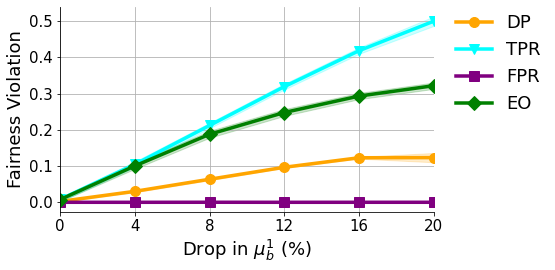

In [37]:
fig, ax = plt.subplots(figsize=(8,4))
fs = 18
ms = 10
alpha = 0.2
x = prob_list
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
DP_diff_mean = DP_diff_list.mean(axis=-1)
DP_diff_std = DP_diff_list.std(axis=-1)
TP_diff_mean = TP_diff_list.mean(axis=-1)
TP_diff_std = TP_diff_list.std(axis=-1)
FP_diff_mean = FP_diff_list.mean(axis=-1)
FP_diff_std = FP_diff_list.std(axis=-1)
EO_diff_mean = EO_diff_list.mean(axis=-1)
EO_diff_std = EO_diff_list.std(axis=-1)
plt.plot(x, DP_diff_mean, c='orange', label='DP', marker='o', markersize=ms)
plt.fill_between(x, DP_diff_mean-DP_diff_std, DP_diff_mean+DP_diff_std, color='orange', alpha=alpha)
plt.plot(x, TP_diff_mean, c='cyan', label='TPR', marker='v', markersize=ms)
plt.fill_between(x, TP_diff_mean-TP_diff_std, TP_diff_mean+TP_diff_std, color='cyan', alpha=alpha)
plt.plot(x, FP_diff_mean, c='purple', label='FPR', marker='s', markersize=ms)
plt.fill_between(x, FP_diff_mean-FP_diff_std, FP_diff_mean+FP_diff_std, color='purple', alpha=alpha)
plt.plot(x, EO_diff_mean, c='green', label='EO', marker='D', markersize=ms)
plt.fill_between(x, EO_diff_mean-EO_diff_std, EO_diff_mean+EO_diff_std, color='green', alpha=alpha)
plt.xlabel(r'Drop in $\mu^1_b$ (%)', fontsize=fs)
plt.ylabel('Fairness Violation', fontsize=fs)
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0,frameon=False, fontsize=fs)
plt.xlim(0,0.2)
plt.xticks(np.linspace(0, 0.2, 6), [0, 4, 8, 12, 16, 20])
plt.tight_layout()
plt.grid()

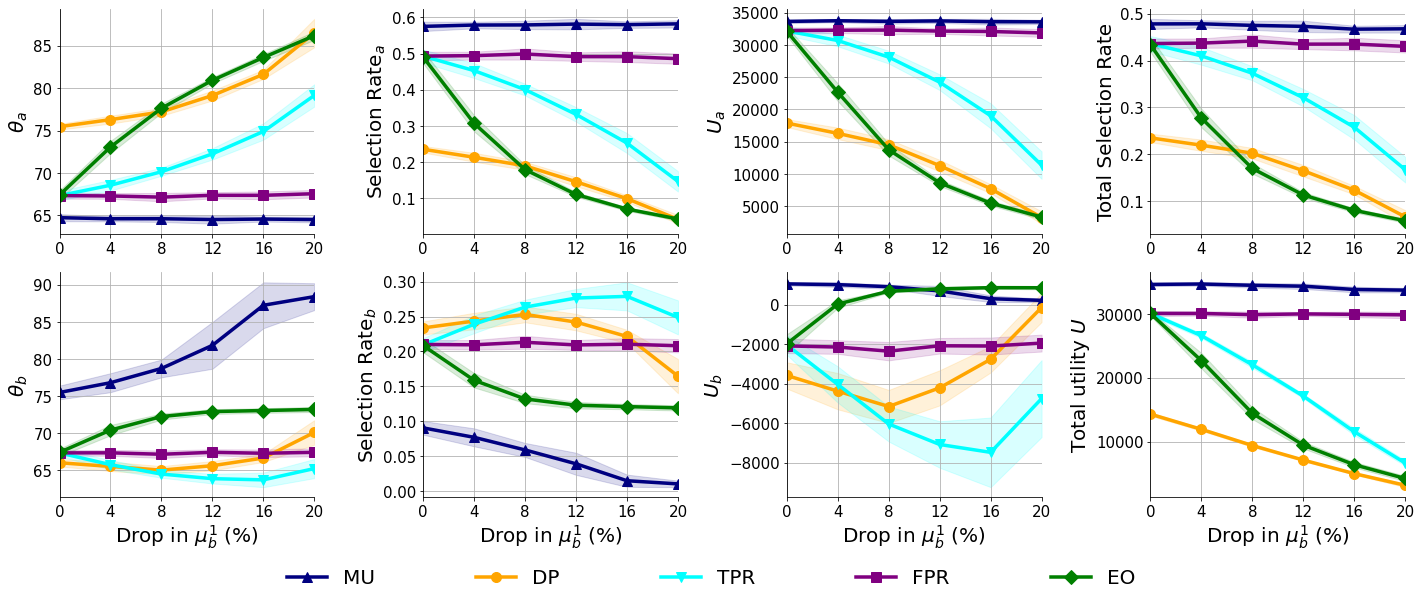

In [35]:
fig, ax = plt.subplots(2,4,figsize=(20,8))
fs = 20
ms = 10
alpha = 0.15
theta_a_MU_mean = theta_a_MU_list.mean(axis=-1)
theta_a_MU_std = theta_a_MU_list.std(axis=-1)
theta_a_DP_mean = theta_a_DP_list.mean(axis=-1)
theta_a_DP_std = theta_a_DP_list.std(axis=-1)
theta_a_TP_mean = theta_a_TP_list.mean(axis=-1)
theta_a_TP_std = theta_a_TP_list.std(axis=-1)
theta_a_FP_mean = theta_a_FP_list.mean(axis=-1)
theta_a_FP_std = theta_a_FP_list.std(axis=-1)
theta_a_EO_mean = theta_a_EO_list.mean(axis=-1)
theta_a_EO_std = theta_a_EO_list.std(axis=-1)
ax[0,0].plot(x, theta_a_MU_mean, c='navy', marker='^', markersize=ms)
ax[0,0].fill_between(x, theta_a_MU_mean+theta_a_MU_std, theta_a_MU_mean-theta_a_MU_std, color='navy', alpha=alpha)
ax[0,0].plot(x, theta_a_DP_mean, c='orange', marker='o', markersize=ms)
ax[0,0].fill_between(x, theta_a_DP_mean+theta_a_DP_std, theta_a_DP_mean-theta_a_DP_std, color='orange', alpha=alpha)
ax[0,0].plot(x, theta_a_TP_mean, c='cyan', marker='v', markersize=ms)
ax[0,0].fill_between(x, theta_a_TP_mean+theta_a_TP_std, theta_a_TP_mean-theta_a_TP_std, color='cyan', alpha=alpha)
ax[0,0].plot(x, theta_a_FP_mean, c='purple', marker='s', markersize=ms)
ax[0,0].fill_between(x, theta_a_FP_mean+theta_a_FP_std, theta_a_FP_mean-theta_a_FP_std, color='purple', alpha=alpha)
ax[0,0].plot(x, theta_a_EO_mean, c='green', marker='D', markersize=ms)
ax[0,0].fill_between(x, theta_a_EO_mean+theta_a_EO_std, theta_a_EO_mean-theta_a_EO_std, color='green', alpha=alpha)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].set_ylabel(r'$\theta_{a}$', fontsize=fs)
theta_b_MU_mean = theta_b_MU_list.mean(axis=-1)
theta_b_MU_std = theta_b_MU_list.std(axis=-1)
theta_b_DP_mean = theta_b_DP_list.mean(axis=-1)
theta_b_DP_std = theta_b_DP_list.std(axis=-1)
theta_b_TP_mean = theta_b_TP_list.mean(axis=-1)
theta_b_TP_std = theta_b_TP_list.std(axis=-1)
theta_b_FP_mean = theta_b_FP_list.mean(axis=-1)
theta_b_FP_std = theta_b_FP_list.std(axis=-1)
theta_b_EO_mean = theta_b_EO_list.mean(axis=-1)
theta_b_EO_std = theta_b_EO_list.std(axis=-1)
ax[1,0].plot(x, theta_b_MU_mean, c='navy', marker='^', markersize=ms)
ax[1,0].fill_between(x, theta_b_MU_mean+theta_b_MU_std, theta_b_MU_mean-theta_b_MU_std, color='navy', alpha=alpha)
ax[1,0].plot(x, theta_b_DP_mean, c='orange', marker='o', markersize=ms)
ax[1,0].fill_between(x, theta_b_DP_mean+theta_b_DP_std, theta_b_DP_mean-theta_b_DP_std, color='orange', alpha=alpha)
ax[1,0].plot(x, theta_b_TP_mean, c='cyan', marker='v', markersize=ms)
ax[1,0].fill_between(x, theta_b_TP_mean+theta_b_TP_std, theta_b_TP_mean-theta_b_TP_std, color='cyan', alpha=alpha)
ax[1,0].plot(x, theta_b_FP_mean, c='purple', marker='s', markersize=ms)
ax[1,0].fill_between(x, theta_b_FP_mean+theta_b_FP_std, theta_b_FP_mean-theta_b_FP_std, color='purple', alpha=alpha)
ax[1,0].plot(x, theta_b_EO_mean, c='green', marker='D', markersize=ms)
ax[1,0].fill_between(x, theta_b_EO_mean+theta_b_EO_std, theta_b_EO_mean-theta_b_EO_std, color='green', alpha=alpha)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)
ax[1,0].set_xlabel(r'Drop in $\mu^1_b$ (%)', fontsize=fs)
ax[1,0].set_ylabel(r'$\theta_{b}$', fontsize=fs)
ax[0,0].set_xticks(np.linspace(0, 0.2, 6))
ax[0,0].set_xticklabels([0, 4, 8, 12, 16, 20])
ax[1,0].set_xticks(np.linspace(0, 0.2, 6))
ax[1,0].set_xticklabels([0, 4, 8, 12, 16, 20])
ax[0,0].set_xlim(0,0.2)
ax[0,0].grid()
ax[1,0].set_xlim(0,0.2)
ax[1,0].grid()

select_a_MU_mean = select_a_MU_list.mean(axis=-1)
select_a_MU_std = select_a_MU_list.std(axis=-1)
select_a_DP_mean = select_a_DP_list.mean(axis=-1)
select_a_DP_std = select_a_DP_list.std(axis=-1)
select_a_TP_mean = select_a_TP_list.mean(axis=-1)
select_a_TP_std = select_a_TP_list.std(axis=-1)
select_a_FP_mean = select_a_FP_list.mean(axis=-1)
select_a_FP_std = select_a_FP_list.std(axis=-1)
select_a_EO_mean = select_a_EO_list.mean(axis=-1)
select_a_EO_std = select_a_EO_list.std(axis=-1)
ax[0,1].plot(x, select_a_MU_mean, c='navy', marker='^', markersize=ms)
ax[0,1].fill_between(x, select_a_MU_mean+select_a_MU_std, select_a_MU_mean-select_a_MU_std, color='navy', alpha=alpha)
ax[0,1].plot(x, select_a_DP_mean, c='orange', marker='o', markersize=ms)
ax[0,1].fill_between(x, select_a_DP_mean+select_a_DP_std, select_a_DP_mean-select_a_DP_std, color='orange', alpha=alpha)
ax[0,1].plot(x, select_a_TP_mean, c='cyan', marker='v', markersize=ms)
ax[0,1].fill_between(x, select_a_TP_mean+select_a_TP_std, select_a_TP_mean-select_a_TP_std, color='cyan', alpha=alpha)
ax[0,1].plot(x, select_a_FP_mean, c='purple', marker='s', markersize=ms)
ax[0,1].fill_between(x, select_a_FP_mean+select_a_FP_std, select_a_FP_mean-select_a_FP_std, color='purple', alpha=alpha)
ax[0,1].plot(x, select_a_EO_mean, c='green', marker='D', markersize=ms)
ax[0,1].fill_between(x, select_a_EO_mean+select_a_EO_std, select_a_EO_mean-select_a_EO_std, color='green', alpha=alpha)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].set_ylabel(r'Selection Rate$_{a}$', fontsize=fs)
select_b_MU_mean = select_b_MU_list.mean(axis=-1)
select_b_MU_std = select_b_MU_list.std(axis=-1)
select_b_DP_mean = select_b_DP_list.mean(axis=-1)
select_b_DP_std = select_b_DP_list.std(axis=-1)
select_b_TP_mean = select_b_TP_list.mean(axis=-1)
select_b_TP_std = select_b_TP_list.std(axis=-1)
select_b_FP_mean = select_b_FP_list.mean(axis=-1)
select_b_FP_std = select_b_FP_list.std(axis=-1)
select_b_EO_mean = select_b_EO_list.mean(axis=-1)
select_b_EO_std = select_b_EO_list.std(axis=-1)
ax[1,1].plot(x, select_b_MU_mean, c='navy', marker='^', markersize=ms)
ax[1,1].fill_between(x, select_b_MU_mean+select_b_MU_std, select_b_MU_mean-select_b_MU_std, color='navy', alpha=alpha)
ax[1,1].plot(x, select_b_DP_mean, c='orange', marker='o', markersize=ms)
ax[1,1].fill_between(x, select_b_DP_mean+select_b_DP_std, select_b_DP_mean-select_b_DP_std, color='orange', alpha=alpha)
ax[1,1].plot(x, select_b_TP_mean, c='cyan', marker='v', markersize=ms)
ax[1,1].fill_between(x, select_b_TP_mean+select_b_TP_std, select_b_TP_mean-select_b_TP_std, color='cyan', alpha=alpha)
ax[1,1].plot(x, select_b_FP_mean, c='purple', marker='s', markersize=ms)
ax[1,1].fill_between(x, select_b_FP_mean+select_b_FP_std, select_b_FP_mean-select_b_FP_std, color='purple', alpha=alpha)
ax[1,1].plot(x, select_b_EO_mean, c='green', marker='D', markersize=ms)
ax[1,1].fill_between(x, select_b_EO_mean+select_b_EO_std, select_b_EO_mean-select_b_EO_std, color='green', alpha=alpha)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)
ax[1,1].set_xlabel(r'Drop in $\mu^1_b$ (%)', fontsize=fs)
ax[1,1].set_ylabel(r'Selection Rate$_{b}$', fontsize=fs)
ax[0,1].set_xticks(np.linspace(0, 0.2, 6))
ax[0,1].set_xticklabels([0, 4, 8, 12, 16, 20])
ax[1,1].set_xticks(np.linspace(0, 0.2, 6))
ax[1,1].set_xticklabels([0, 4, 8, 12, 16, 20])
ax[0,1].set_xlim(0,0.2)
ax[0,1].grid()
ax[1,1].set_xlim(0,0.2)
ax[1,1].grid()

util_a_MU_mean = util_a_MU_list.mean(axis=-1)
util_a_MU_std = util_a_MU_list.std(axis=-1)
util_a_DP_mean = util_a_DP_list.mean(axis=-1)
util_a_DP_std = util_a_DP_list.std(axis=-1)
util_a_TP_mean = util_a_TP_list.mean(axis=-1)
util_a_TP_std = util_a_TP_list.std(axis=-1)
util_a_FP_mean = util_a_FP_list.mean(axis=-1)
util_a_FP_std = util_a_FP_list.std(axis=-1)
util_a_EO_mean = util_a_EO_list.mean(axis=-1)
util_a_EO_std = util_a_EO_list.std(axis=-1)
ax[0,2].plot(x, util_a_MU_mean, c='navy', marker='^', markersize=ms)
ax[0,2].fill_between(x, util_a_MU_mean+util_a_MU_std, util_a_MU_mean-util_a_MU_std, color='navy', alpha=alpha)
ax[0,2].plot(x, util_a_DP_mean, c='orange', marker='o', markersize=ms)
ax[0,2].fill_between(x, util_a_DP_mean+util_a_DP_std, util_a_DP_mean-util_a_DP_std, color='orange', alpha=alpha)
ax[0,2].plot(x, util_a_TP_mean, c='cyan', marker='v', markersize=ms)
ax[0,2].fill_between(x, util_a_TP_mean+util_a_TP_std, util_a_TP_mean-util_a_TP_std, color='cyan', alpha=alpha)
ax[0,2].plot(x, util_a_FP_mean, c='purple', marker='s', markersize=ms)
ax[0,2].fill_between(x, util_a_FP_mean+util_a_FP_std, util_a_FP_mean-util_a_FP_std, color='purple', alpha=alpha)
ax[0,2].plot(x, util_a_EO_mean, c='green', marker='D', markersize=ms)
ax[0,2].fill_between(x, util_a_EO_mean+util_a_EO_std, util_a_EO_mean-util_a_EO_std, color='green', alpha=alpha)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)
ax[0,2].set_ylabel(r'$U_{a}$', fontsize=fs)
util_b_MU_mean = util_b_MU_list.mean(axis=-1)
util_b_MU_std = util_b_MU_list.std(axis=-1)
util_b_DP_mean = util_b_DP_list.mean(axis=-1)
util_b_DP_std = util_b_DP_list.std(axis=-1)
util_b_TP_mean = util_b_TP_list.mean(axis=-1)
util_b_TP_std = util_b_TP_list.std(axis=-1)
util_b_FP_mean = util_b_FP_list.mean(axis=-1)
util_b_FP_std = util_b_FP_list.std(axis=-1)
util_b_EO_mean = util_b_EO_list.mean(axis=-1)
util_b_EO_std = util_b_EO_list.std(axis=-1)
ax[1,2].plot(x, util_b_MU_mean, c='navy', marker='^', markersize=ms)
ax[1,2].fill_between(x, util_b_MU_mean+util_b_MU_std, util_b_MU_mean-util_b_MU_std, color='navy', alpha=alpha)
ax[1,2].plot(x, util_b_DP_mean, c='orange', marker='o', markersize=ms)
ax[1,2].fill_between(x, util_b_DP_mean+util_b_DP_std, util_b_DP_mean-util_b_DP_std, color='orange', alpha=alpha)
ax[1,2].plot(x, util_b_TP_mean, c='cyan', marker='v', markersize=ms)
ax[1,2].fill_between(x, util_b_TP_mean+util_b_TP_std, util_b_TP_mean-util_b_TP_std, color='cyan', alpha=alpha)
ax[1,2].plot(x, util_b_FP_mean, c='purple', marker='s', markersize=ms)
ax[1,2].fill_between(x, util_b_FP_mean+util_b_FP_std, util_b_FP_mean-util_b_FP_std, color='purple', alpha=alpha)
ax[1,2].plot(x, util_b_EO_mean, c='green', marker='D', markersize=ms)
ax[1,2].fill_between(x, util_b_EO_mean+util_b_EO_std, util_b_EO_mean-util_b_EO_std, color='green', alpha=alpha)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['top'].set_visible(False)
ax[1,2].set_xlabel(r'Drop in $\mu^1_b$ (%)', fontsize=fs)
ax[1,2].set_ylabel(r'$U_{b}$', fontsize=fs)
ax[0,2].set_xticks(np.linspace(0, 0.2, 6))
ax[0,2].set_xticklabels([0, 4, 8, 12, 16, 20])
ax[1,2].set_xticks(np.linspace(0, 0.2, 6))
ax[1,2].set_xticklabels([0, 4, 8, 12, 16, 20])
ax[0,2].set_xlim(0,0.2)
ax[0,2].grid()
ax[1,2].set_xlim(0,0.2)
ax[1,2].grid()

select_total_MU_mean = select_total_MU_list.mean(axis=-1)
select_total_MU_std = select_total_MU_list.std(axis=-1)
select_total_DP_mean = select_total_DP_list.mean(axis=-1)
select_total_DP_std = select_total_DP_list.std(axis=-1)
select_total_TP_mean = select_total_TP_list.mean(axis=-1)
select_total_TP_std = select_total_TP_list.std(axis=-1)
select_total_FP_mean = select_total_FP_list.mean(axis=-1)
select_total_FP_std = select_total_FP_list.std(axis=-1)
select_total_EO_mean = select_total_EO_list.mean(axis=-1)
select_total_EO_std = select_total_EO_list.std(axis=-1)
ax[0,3].plot(x, select_total_MU_mean, c='navy', marker='^', markersize=ms)
ax[0,3].fill_between(x, select_total_MU_mean+select_total_MU_std, select_total_MU_mean-select_total_MU_std, color='navy', alpha=alpha)
ax[0,3].plot(x, select_total_DP_mean, c='orange', marker='o', markersize=ms)
ax[0,3].fill_between(x, select_total_DP_mean+select_total_DP_std, select_total_DP_mean-select_total_DP_std, color='orange', alpha=alpha)
ax[0,3].plot(x, select_total_TP_mean, c='cyan', marker='v', markersize=ms)
ax[0,3].fill_between(x, select_total_TP_mean+select_total_TP_std, select_total_TP_mean-select_total_TP_std, color='cyan', alpha=alpha)
ax[0,3].plot(x, select_total_FP_mean, c='purple', marker='s', markersize=ms)
ax[0,3].fill_between(x, select_total_FP_mean+select_total_FP_std, select_total_FP_mean-select_total_FP_std, color='purple', alpha=alpha)
ax[0,3].plot(x, select_total_EO_mean, c='green', marker='D', markersize=ms)
ax[0,3].fill_between(x, select_total_EO_mean+select_total_EO_std, select_total_EO_mean-select_total_EO_std, color='green', alpha=alpha)
ax[0,3].spines['right'].set_visible(False)
ax[0,3].spines['top'].set_visible(False)
ax[0,3].set_ylabel('Total Selection Rate', fontsize=fs)
util_total_MU_mean = util_total_MU_list.mean(axis=-1)
util_total_MU_std = util_total_MU_list.std(axis=-1)
util_total_DP_mean = util_total_DP_list.mean(axis=-1)
util_total_DP_std = util_total_DP_list.std(axis=-1)
util_total_TP_mean = util_total_TP_list.mean(axis=-1)
util_total_TP_std = util_total_TP_list.std(axis=-1)
util_total_FP_mean = util_total_FP_list.mean(axis=-1)
util_total_FP_std = util_total_FP_list.std(axis=-1)
util_total_EO_mean = util_total_EO_list.mean(axis=-1)
util_total_EO_std = util_total_EO_list.std(axis=-1)
ax[1,3].plot(x, util_total_MU_mean, c='navy', label='MU', marker='^', markersize=ms)
ax[1,3].fill_between(x, util_total_MU_mean+util_total_MU_std, util_total_MU_mean-util_total_MU_std, color='navy', alpha=alpha)
ax[1,3].plot(x, util_total_DP_mean, c='orange', label='DP', marker='o', markersize=ms)
ax[1,3].fill_between(x, util_total_DP_mean+util_total_DP_std, util_total_DP_mean-util_total_DP_std, color='orange', alpha=alpha)
ax[1,3].plot(x, util_total_TP_mean, c='cyan', label='TPR', marker='v', markersize=ms)
ax[1,3].fill_between(x, util_total_TP_mean+util_total_TP_std, util_total_TP_mean-util_total_TP_std, color='cyan', alpha=alpha)
ax[1,3].plot(x, util_total_FP_mean, c='purple', label='FPR', marker='s', markersize=ms)
ax[1,3].fill_between(x, util_total_FP_mean+util_total_FP_std, util_total_FP_mean-util_total_FP_std, color='purple', alpha=alpha)
ax[1,3].plot(x, util_total_EO_mean, c='green', label='EO', marker='D', markersize=ms)
ax[1,3].fill_between(x, util_total_EO_mean+util_total_EO_std, util_total_EO_mean-util_total_EO_std, color='green', alpha=alpha)
ax[1,3].spines['right'].set_visible(False)
ax[1,3].spines['top'].set_visible(False)
ax[1,3].set_xlabel(r'Drop in $\mu^1_b$ (%)', fontsize=fs)
ax[1,3].set_ylabel(r'Total utility $U$', fontsize=fs)
ax[0,3].set_xticks(np.linspace(0, 0.2, 6))
ax[0,3].set_xticklabels([0, 4, 8, 12, 16, 20])
ax[1,3].set_xticks(np.linspace(0, 0.2, 6))
ax[1,3].set_xticklabels([0, 4, 8, 12, 16, 20])
ax[0,3].set_xlim(0,0.2)
ax[0,3].grid()
ax[1,3].set_xlim(0,0.2)
ax[1,3].grid()
plt.tight_layout()
fig.legend(bbox_to_anchor=(0.2,-0.05,0.6,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=5,frameon=False, fontsize=fs)
plt.show()